In [ ]:
!pip install --user pandas matplotlib seaborn panel sklearn

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
sea.set(color_codes=True)
import panel as pn
from sklearn.model_selection import train_test_split
from algorithms.Regression import Regression
from util.data_processing import *
from util.aqi import AQI


In [4]:
data = read_data("beograd")
data.head()

,Vreme,PM10 [ug.m-3],O3 [ug.m-3],NO2 [ug.m-3],NOX [ug.m-3],CO [mg.m-3],NO [ug.m-3],PM2.5 [ug.m-3],PM1 [ug.m-3],V [m/s],dd [°],P [mb],t [°C],Rh [%]
0,2019-11-03 17:00:00,21.66,35.36,21.23,31.44,0.30,6.67,17.04,16.13,2.01,224.93,992.87,20.16,55.64
1,2019-11-03 18:00:00,24.14,33.42,22.74,34.53,0.30,7.65,18.15,16.87,1.83,229.53,992.72,19.87,56.26
2,2019-11-03 19:00:00,24.20,34.39,22.95,34.00,0.32,7.25,17.91,16.56,2.17,227.10,992.13,19.70,56.96
3,2019-11-03 20:00:00,22.06,36.53,19.88,29.92,0.35,6.54,16.34,15.48,1.85,230.43,992.12,19.65,57.00
4,2019-11-03 21:00:00,22.16,38.23,16.79,25.34,0.30,5.58,17.41,15.95,1.83,228.89,991.99,19.30,58.04


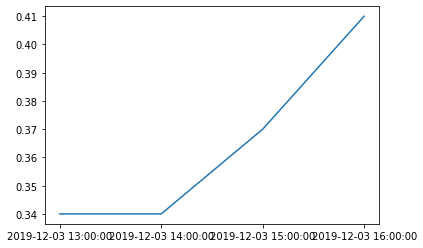

In [5]:
x = data["Vreme"].tail()
y = data["CO [mg.m-3]"].tail()

plt.plot(x,y)

## Algoritmi
Algoritmi koji bi se koristili u implementaciji projekta su:


###  Određivanje AQI (Air Quality Index)




In [57]:
constraints = {
    "AQI": [0,50, 100, 150, 200, 300, 400, 500],
    "CO": [0,4.4, 9.4, 12.4, 15.4, 30.4, 40.4, 50.4],
    "SO2": [0,35, 75, 185, 304, 604, 804, 1004],
    "NO2": [0,53, 100, 360, 649, 1249, 1649, 2049],
    "PM25": [0,12, 35.4, 55.4, 150.4, 250.4, 350.4, 500.4]
}

class AQI():
    
    def calculate_aqi(self,conc,gas):
        for i in range(0,len(constraints[gas]) - 1):
            if constraints[gas][i] < conc <= constraints[gas][i+1]:
                mmin = i
                mmax = i + 1
                break

        aqi = (conc - constraints[gas][mmin]) * (constraints["AQI"][mmax] - constraints["AQI"][mmin])
        aqi /= (constraints[gas][mmax] - constraints[gas][mmin])
        aqi += constraints["AQI"][mmin]
        return aqi
    
    def categorize_aqi(self,conc,gas):
        aqi = self.calculate_aqi(conc,gas)
        for i in range(0,len(constraints[gas]) - 1):
            if constraints[gas][i] < aqi <= constraints[gas][i+1]:
                return i + 1
        return 0
        

    def get_value(self):
        return self.aqi

#### Pridodajemo za svaki red njegovu izracunatu AQI vrednost

Mozemo konkretnu vrednost AQI, kao i klasu kojoj pripada.

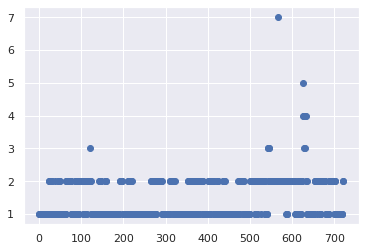

In [58]:
data = read_data("beograd")
data.head()
x = data["Vreme"].values
x = np.linspace(0, len(x), len(x))
y = data["CO [mg.m-3]"].ffill(axis=0)
aqi = AQI()
y = y.apply(lambda row: aqi.categorize_aqi(row, "CO"))
y.head()
plt.scatter(x,y)

In [ ]:
plt.plot(x,y[])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

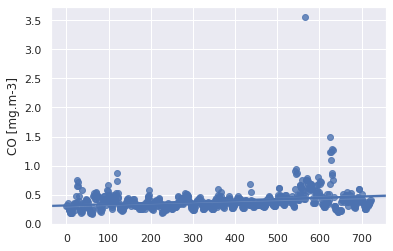

In [55]:
data = read_data("beograd")
data.head()
x = data["Vreme"].values
x = np.linspace(0, len(x), len(x))
y = data["CO [mg.m-3]"].ffill(axis=0)
model = Regression(1.)
model.fit(x_train, y_train, "ridge")
b, a = model.w
sea.regplot(x,y,x)
